In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_input=pd.read_csv("H:\\MINI PROJECT\\Bank_Loans2\\Credit_Risk_Train_data.csv")
test_input=pd.read_csv("H:\\MINI PROJECT\\Bank_Loans2\\Credit_Risk_Validate_data.csv")


In [9]:
train_input

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
1,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
2,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
3,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
4,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,LP002920,Male,Yes,0,Graduate,No,5119,3769.0,120.0,360.0,1.0,Rural,Y
298,LP002952,Male,No,0,Graduate,No,2500,0.0,60.0,360.0,1.0,Urban,Y
299,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,Y
300,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y


In [10]:
test_input

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,LP002965,Female,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,Y
675,LP002969,Male,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban,Y
676,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
677,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y


In [11]:
print (train_input.columns)
print (test_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [12]:
print (train_input.shape)
print (test_input.shape)
#the last column has a different name in both,
#lets make the names same. and then merge them togehter
#so that we can fill the missing values simulteneously
test_input.rename(columns={"outcome": "Loan_Status"},inplace=True)

(302, 13)
(679, 13)


In [13]:
all=pd.concat([train_input,test_input],axis=0)
all.shape

(981, 13)

In [14]:
print (all.tail())
all.reset_index(inplace=True,drop=True)# reset index else merging will have
#issues, 

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
674  LP002965  Female     Yes          0      Graduate            No   
675  LP002969    Male     Yes          1      Graduate            No   
676  LP002971    Male     Yes         3+  Not Graduate           Yes   
677  LP002975    Male     Yes          0      Graduate            No   
678  LP002986    Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
674             8550             4255.0        96.0             360.0   
675             2269             2167.0        99.0             360.0   
676             4009             1777.0       113.0             360.0   
677             4158              709.0       115.0             360.0   
678             5000             2393.0       158.0             360.0   

     Credit_History Property_Area Loan_Status  
674             NaN         Urban           Y  
675             1.0     Semiurba

In [15]:
all.isnull().sum()#gives the missing value of all columns

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
all.shape # read the decription of each column from the word document

(981, 13)

In [24]:
# before proceeding to Model Building, lets fill the missing values data cleaning

In [18]:
Counter(all['Gender'])

Counter({'Male': 775, nan: 24, 'Female': 182})

In [19]:
#lets fill them by Male
print (all[all['Gender'].isnull()].index.tolist())
#these rows are null for gender
#lets fill them with the Model of Gender  i.e Male
gender_null=all[all['Gender'].isnull()].index.tolist()

[7, 38, 102, 141, 146, 180, 221, 274, 286, 421, 432, 520, 625, 653, 701, 712, 742, 763, 822, 872, 887, 897, 932, 937]


In [20]:
all['Gender'].iloc[gender_null]="Male"

In [21]:
#check if filed
print (sum(all['Gender'].isnull()))#oky done
Counter(all['Gender'])

0


Counter({'Male': 799, 'Female': 182})

In [25]:
#lets fill Married now
print (Counter(all['Married']))#most are married
#lets fill them Yes if they have dependents else No
pd.crosstab(all['Married'].isnull(),all['Dependents'].isnull())
# for all 3 missing values in Married , the # of dependents are also missing
# let fill them with the Yes--i.e married as most customers are marrried

Counter({'Yes': 631, 'No': 347, nan: 3})


Dependents,False,True
Married,,
False,956,22
True,0,3


In [26]:
married_null=all[all['Married'].isnull()].index.tolist()
married_null

[374, 460, 603]

In [27]:
all['Married'].iloc[married_null]=np.repeat("Yes",len(married_null))

In [28]:
all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
Counter(all['Dependents'])

Counter({'0': 545, '2': 160, '1': 160, '3+': 91, nan: 25})

In [30]:
#elts see the Dependents wrt Marriage
pd.crosstab(all['Married'],all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [31]:
pd.crosstab(all['Dependents'],all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [32]:
# for the bacheors, lets fill the missing dependents as 0
#lets find the index of all rows with Depednednts mssing and Married NO
bachelor_nulldependent=all[(all['Married']=="No") & (all['Dependents'].isnull())].index.tolist()

In [33]:
all['Dependents'].iloc[bachelor_nulldependent]='0'

In [34]:
Counter(all['Dependents'])

Counter({'0': 554, '2': 160, '1': 160, '3+': 91, nan: 16})

In [35]:
#for the remaining 16 missing depemdents,
#let see how mnay dependents Male & Female have
pd.crosstab(all['Gender'],all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [36]:
# so feamle have less dependents
#lets see the gender of the 8 missing dependents
all['Gender'].iloc[all[all['Dependents'].isnull()].index.tolist()]

36       Male
69       Male
103      Male
159      Male
203      Male
223      Male
251      Male
264      Male
372      Male
374      Male
460      Male
511      Male
542      Male
603    Female
697      Male
901      Male
Name: Gender, dtype: object

In [37]:
# all of them are Male
# lets fill them with the mode of all dependent of male
pd.crosstab(all['Gender'],all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [38]:
#let sfill the # dependent with 1
all['Dependents'].iloc[all[all['Dependents'].isnull()].index.tolist()]="0"

In [39]:
all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
Counter(all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [41]:
self_emp_null=all[all['Self_Employed'].isnull()].index.tolist()

In [42]:
#fill missing selfemployed with NO
all['Self_Employed'].iloc[self_emp_null]="No"

In [43]:
all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
pd.crosstab(all['LoanAmount'].isnull(),all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [45]:
all.groupby(all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [46]:
#lets fill the missing values in LoanAmount 
#with the mean of the respective Loan_Term
#we see that 180 & 240 has the almost same Loan amount 128-131
#& 360 has high i.e 144
#so lets fill only 360 by 144 
#and all remaining by 130
all['LoanAmount'][(all['LoanAmount'].isnull()) & (all['Loan_Amount_Term']==360)]=144

In [47]:
all['LoanAmount'][(all['LoanAmount'].isnull())]=130

In [48]:
#lets fill Loan Amount Term
(all['Loan_Amount_Term']).value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [49]:
#lets find the Loan Tenure by the mode i,e 512
all['Loan_Amount_Term'][all['Loan_Amount_Term'].isnull()]=360

In [50]:
all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
all['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [52]:
pd.crosstab(all['Gender'],all['Credit_History']) 
# Gender makes no difference

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


In [53]:
pd.crosstab(all['Self_Employed'],all['Credit_History'])
# Self_Employed makes no difference

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [54]:
pd.crosstab(all['Education'],all['Credit_History'])
# Education makes no difference

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [55]:
pd.crosstab(all['Married'],all['Credit_History'])
# Education makes no difference

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


In [56]:
# run a logistic regression to fill the Credit History for the 50 missing values

In [57]:
all.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
#prepare a train set which has all values of Credit History present
#make the rows having Credit History missig as test set
#before spliting lets first create the dummies
all.columns
#df_dummy1=#for Gender
#df_dummy2=#for married
#df_dummy3=#for dependents
#df_dummy4=
#convert one columns at a time by using pd.get_dummies or use
all_new=pd.get_dummies(all.drop(['Loan_ID'],axis=1),drop_first=True)

In [59]:
all_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
1,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
2,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0
3,3200,700.0,70.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
4,3596,0.0,100.0,240.0,NaN,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,8550,4255.0,96.0,360.0,NaN,0,1,0,0,0,0,0,0,1,1
977,2269,2167.0,99.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
978,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,1
979,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1


In [60]:
all_new.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             79
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64

In [61]:
#split into train test
test=all_new[all_new['Credit_History'].isnull()]
all_in_test=test.index.tolist()
test.tail()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
911,3579,3308.0,138.0,360.0,NaN,1,0,0,0,0,0,0,1,0,1
922,5530,0.0,135.0,360.0,NaN,0,0,0,0,0,0,0,0,1,1
955,3500,1658.0,104.0,360.0,NaN,1,1,1,0,0,0,0,1,0,1
960,3015,2000.0,145.0,360.0,NaN,0,0,0,0,0,1,0,0,1,1
976,8550,4255.0,96.0,360.0,NaN,0,1,0,0,0,0,0,0,1,1


In [62]:
all_in_train=[x for x in all_new.index.tolist() if x not in all_in_test]
train=all_new.iloc[all_in_train]
train.shape

(902, 15)

In [63]:
test.shape

(79, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184818A6C50>,
      dtype=object)

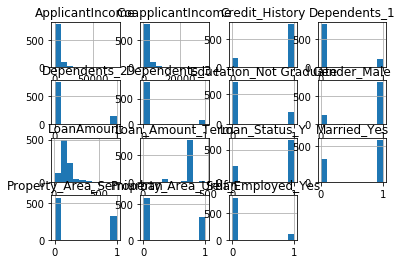

In [64]:
train.hist()

In [65]:
corr_matrix = train.corr()
corr_matrix["Loan_Status_Y"].sort_values(ascending=False)

Loan_Status_Y              1.000000
Credit_History             0.654401
Property_Area_Semiurban    0.101217
Married_Yes                0.088524
Gender_Male                0.041675
Dependents_2               0.041304
Self_Employed_Yes          0.029947
Dependents_1               0.019001
ApplicantIncome            0.018593
Property_Area_Urban        0.009629
Dependents_3+             -0.013878
CoapplicantIncome         -0.028097
LoanAmount                -0.032558
Loan_Amount_Term          -0.045194
Education_Not Graduate    -0.081176
Name: Loan_Status_Y, dtype: float64

In [66]:
X_train=train.drop(['Loan_Status_Y','Credit_History'],axis=1)
Y_train=train['Loan_Status_Y']

In [67]:
X_test=test.drop(['Loan_Status_Y','Credit_History'],axis=1)
Y_test=test['Loan_Status_Y']

In [68]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [69]:
log_reg=LogisticRegression()

In [70]:
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred=log_reg.predict(X_test)

In [72]:
#replace the Nan's in the test with these values
test['Credit_History']=pred

In [73]:
#remerge the train & test
df_all=pd.concat([train,test],axis=0)

In [90]:
df_all.shape

(981, 15)

In [91]:
df_all.head()
df_all.isnull().sum()
#all good

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [124]:
#split back into the original train & test 
test2=df_all.head(len(train_input))
train2=df_all.tail(len(test_input))

In [125]:
train2.shape

(679, 15)

In [126]:
X_train=train2.drop(['Loan_Status_Y'],axis=1)
Y_train=train2['Loan_Status_Y']
X_test=test2.drop(['Loan_Status_Y'],axis=1)
Y_test=test2['Loan_Status_Y']

In [127]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
#above the default values of C & gamma is taken
pred=model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       212

    accuracy                           0.70       302
   macro avg       0.35      0.50      0.41       302
weighted avg       0.49      0.70      0.58       302



In [131]:
print(confusion_matrix(Y_test,pred))

[[  0  90]
 [  0 212]]


In [132]:
print (Counter(test2['Loan_Status_Y']))
baselin_acccuracy=float(282)/(282+85)
print (baselin_acccuracy)
Accuracy=float(282+1)/(282+1+84)
Accuracy # not very good compared to basline

Counter({1: 212, 0: 90})
0.7683923705722071


0.771117166212534

In [133]:
#lets play with the C & gamma parameter in SVM

from sklearn.model_selection import GridSearchCV

In [134]:
param_grid={'C':[0.001,0.01,0.05,0.1,1,2],
           'gamma':[1,0.08,0.09,0.10,0.01],
           'kernel': ['linear']}

In [135]:
#Grid Search on SVM
grid=GridSearchCV(SVC(),param_grid,verbose=2)

In [136]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=0.001, gamma=1, kernel=linear, total= 1.0min
[CV] C=0.001, gamma=1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] .................. C=0.001, gamma=1, kernel=linear, total= 1.3min
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .................. C=0.001, gamma=1, kernel=linear, total= 1.1min
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .................. C=0.001, gamma=1, kernel=linear, total= 1.5min
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .................. C=0.001, gamma=1, kernel=linear, total= 1.5min
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] ............... C=0.001, gamma=0.08, kernel=linear, total=  57.9s
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] ............... C=0.001, gamma=0.08, kernel=linear, total= 1.3min
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] ............... C=0.001, gamma=0.08, kernel=linear, total= 1.7min
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] .

[CV] ................ C=0.05, gamma=0.08, kernel=linear, total= 2.2min
[CV] C=0.05, gamma=0.09, kernel=linear ...............................
[CV] ................ C=0.05, gamma=0.09, kernel=linear, total= 1.4min
[CV] C=0.05, gamma=0.09, kernel=linear ...............................
[CV] ................ C=0.05, gamma=0.09, kernel=linear, total= 3.9min
[CV] C=0.05, gamma=0.09, kernel=linear ...............................
[CV] ................ C=0.05, gamma=0.09, kernel=linear, total= 2.0min
[CV] C=0.05, gamma=0.09, kernel=linear ...............................
[CV] ................ C=0.05, gamma=0.09, kernel=linear, total= 2.5min
[CV] C=0.05, gamma=0.09, kernel=linear ...............................
[CV] ................ C=0.05, gamma=0.09, kernel=linear, total= 1.9min
[CV] C=0.05, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.05, gamma=0.1, kernel=linear, total= 1.4min
[CV] C=0.05, gamma=0.1, kernel=linear ................................
[CV] .

[CV] .................... C=1, gamma=0.1, kernel=linear, total= 5.3min
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total= 7.5min
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total= 2.6min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total= 3.9min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total= 3.5min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total= 5.7min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total= 7.4min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 543.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 1, 2],
                         'gamma': [1, 0.08, 0.09, 0.1, 0.01],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [137]:
print (grid.best_params_)
print (grid.best_estimator_)
# print (grid.best_params_['max_depth'])

{'C': 0.05, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [138]:
grid_pred=grid.predict(X_test)
grid_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [139]:
Counter(grid_pred)

Counter({1: 260, 0: 42})

In [140]:
print(confusion_matrix(Y_test,grid_pred))

[[ 41  49]
 [  1 211]]


In [141]:
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

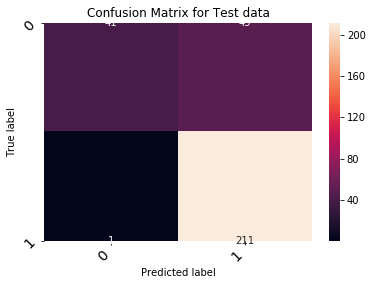

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt 
plot_conf_matrix(confusion_matrix(Y_test, grid_pred), "Test data")
# from sklearn.metrics import confusion_matrix


# cm = confusion_matrix(Y_test, grid_pred)
# print(cm)
# fig = plt.figure()

In [143]:
acc_rf = accuracy_score(Y_test, grid_pred)
print(acc_rf)

0.8344370860927153


In [144]:
import pickle
pickle.dump(grid, open('bank_loansnew.pkl','wb'))
models = pickle.load(open('bank_loansnew.pkl','rb'))

In [174]:
print(grid.predict([[60, 25.0,265.0, 360.0,7, 78,0,12,1,0,1,3,1,1]]))

[1]


In [146]:
from sklearn.metrics import precision_score, recall_score

print ("Precision score is : " , precision_score(Y_test, grid_pred))
print ("Recall score is : " , recall_score(Y_test, grid_pred))

Precision score is :  0.8115384615384615
Recall score is :  0.9952830188679245


In [147]:
from sklearn.metrics import f1_score

f1_score(Y_test, grid_pred)

0.8940677966101694

In [148]:
print(classification_report(Y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.46      0.62        90
           1       0.81      1.00      0.89       212

    accuracy                           0.83       302
   macro avg       0.89      0.73      0.76       302
weighted avg       0.86      0.83      0.81       302



In [149]:
y_prr=grid_pred
# new = np.reshape(y_prr, (-1, 2))

In [150]:
Y_test.shape

(302,)

In [151]:
grid_pred.shape

(302,)

In [152]:
def plot_roc_curve( roc_auc_test):
    plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

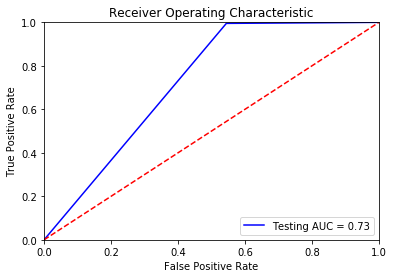

In [153]:
# #train data ROC
# fpr_tr, tpr_tr, threshold = roc_curve(Y_train, y_prr)
# roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(Y_test, y_prr)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_test)


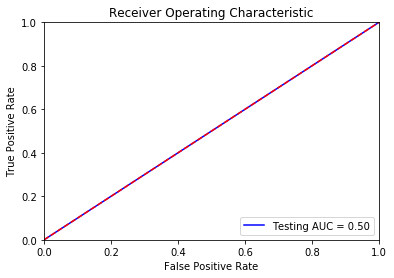

In [154]:
fpr_ts, tpr_ts, threshold = roc_curve(Y_test, pred)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_test)
